# Question 1

In [65]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
sns.set_context('notebook') # optimise figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [67]:
means = [1,-2,4]
cov_matrix = np.matrix([[0.6113,0.3416,0.3854],[0.3416,0.4955,0.1194],[0.3854,0.1194,0.3048]])

In [68]:
mn = multivariate_normal(mean=means, cov=cov_matrix)
sample = mn.rvs(size=1000, random_state=12345)
x = sample[:,0]
y = sample[:,1]
z = sample[:,2]

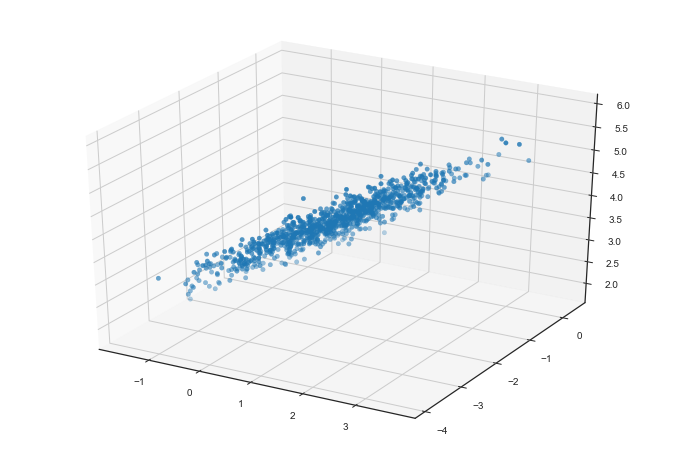

In [69]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(x, y, z)
pyplot.show()

In [70]:
mean_val = np.mean(sample, axis=0)
mean_val

array([ 0.98941754, -2.01805377,  3.99502347])

In [71]:
sample_trans = np.transpose(sample)
cov_mat = np.cov(sample_trans)

In [72]:
#lets take a larger sample
means_MC = []
for i in range(1000):
    draw = big_sample = mn.rvs(size=10000)
    x_marg = big_sample[:,0]
    val = np.square(x_marg)
    val = np.mean(val)
    means_MC.append(val)
np.mean(means_MC)

1.6112125837220175

# Question 2

In [73]:
#gamma parameteres
k = [1,2,3,4,9,7.5,5]
sigma = [2,2,2,2,1,0.5,1]

In [74]:
draws = []
for i in range(len(k)):
    shape = k[i]
    scale = sigma[i]
    s = np.random.gamma(shape, scale, 1000)
    draws.append(s)

In [75]:
bins = np.linspace(0,20,100)
vals = np.zeros(100)
dist1 = draws[0]
dist2 = draws[1]
dist3 = draws[2]
dist4 = draws[3]
dist5 = draws[4]
dist6 = draws[5]
dist7 = draws[6]

In [122]:
def generate_pdf(x):
    bins = np.linspace(0,20,40)
    vals = np.zeros(40)
    for i in range(len(x)):
        for j in range(len(bins)-1):
            if bins[j] <= x[i] < bins[j+1]:
                vals[j] = vals[j] + 1
    vals = vals/1000
    ax = plt.subplot()
    t = bins
    s = vals
    line, = plt.plot(t, s, lw=2)

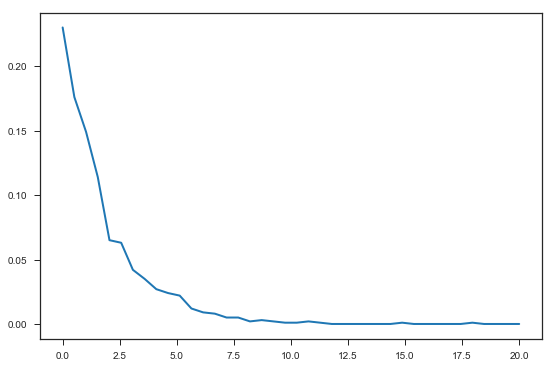

In [123]:
generate_pdf(dist1)

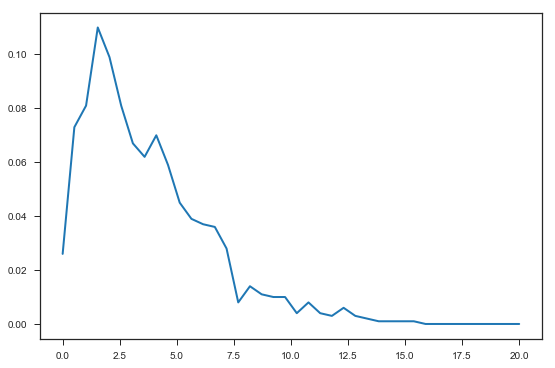

In [124]:
generate_pdf(dist2)

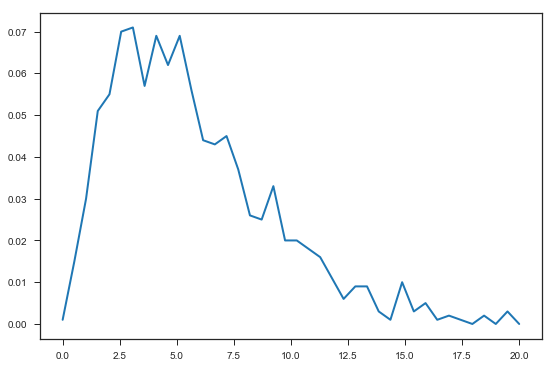

In [125]:
generate_pdf(dist3)

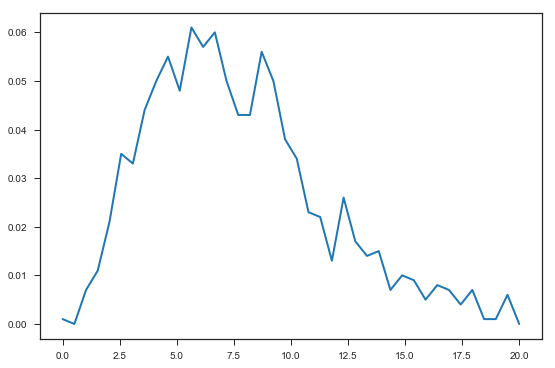

In [126]:
generate_pdf(dist4)

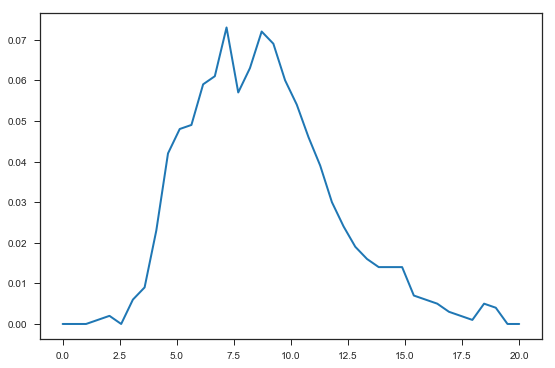

In [127]:
generate_pdf(dist5)

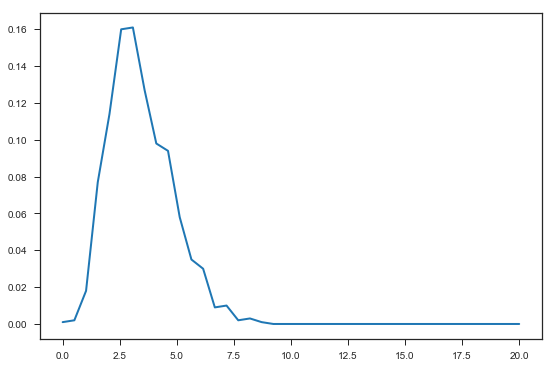

In [128]:
generate_pdf(dist6)

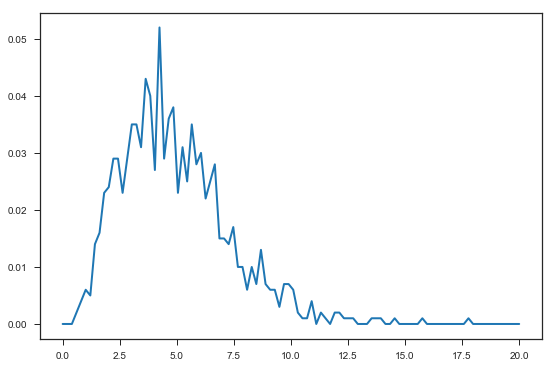

In [83]:
generate_pdf(dist7)

In [84]:
def MC(k_,sigma_):
    means_Q2 = np.zeros(1000)
    std_devs = np.zeros(1000)
    for i in range(1000):
        MC = np.random.gamma(k_, sigma_,1000)
        means_Q2[i] = np.mean(MC)
        std_devs = np.std(MC)
    print("The mean of the draw is", np.mean(means_Q2))
    print("The standard deviation of the draw is", np.mean(std_devs))

for i in range(len(k)):
    MC(k[i],sigma[i])


The mean of the draw is 1.99983101349
The standard deviation of the draw is 1.92534239395
The mean of the draw is 4.00572434401
The standard deviation of the draw is 2.91799300048
The mean of the draw is 5.99933810128
The standard deviation of the draw is 3.54062540883
The mean of the draw is 8.00215747206
The standard deviation of the draw is 4.10893442994
The mean of the draw is 9.00316728074
The standard deviation of the draw is 3.04124115752
The mean of the draw is 3.7504859943
The standard deviation of the draw is 1.36116462626
The mean of the draw is 4.99871659432
The standard deviation of the draw is 2.18756945722


# Question 3

In [135]:
import scipy as sc

In [141]:
def gamma_dist(_k,_sigma, x):
    first = (sc.special.gamma(_k))*(_sigma**_k)
    second = (x**(_k-1))*np.exp(-(x/_sigma))
    ans = second/first
    return(ans)

In [162]:
gamma_dist(10,0.5,2)

0.026462383382100597

In [191]:
X=np.linspace(0,10,1000)
y2=max((gamma_dist(10,0.5,X)))+0.000001
x_val = np.random.uniform(0,10,10000000)
y_val = np.random.uniform(0,y2,10000000)

In [192]:
num = 0
count = []
for i in range(len(y_val)):
    if y_val[i] < gamma_dist(10,0.5,x_val[i]):
        count.append(1)
    else:
        count.append(0)
integral = (np.mean(count))*10*y2

In [193]:
integral

0.99508797975215324

# Question 7

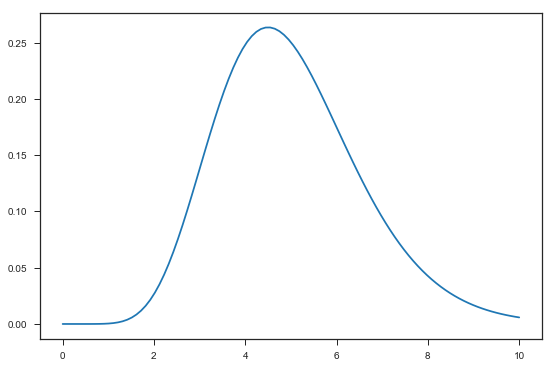

In [99]:
from scipy.stats import gamma

In [100]:
np.mean(ans)

0.098533997251749744